In [7]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.syseng.throughputs as st

### Detector QE curves

In [10]:
# Read the individual and combined vendor detectors and plot.
detector_rootdir = defaultDirs['detector'].replace('/joint_minimum', '')
print('detector options"', os.listdir(detector_rootdir))

detector options" ['joint_minimum', 'e2v', 'itl']


In [21]:
det = {}
det['e2v'] = st.buildVendorDetector(os.path.join(detector_rootdir, 'e2v'), addLosses=True)
det['itl'] = st.buildVendorDetector(os.path.join(detector_rootdir, 'itl'), addLosses=True)
det['det'] = st.buildDetector(defaultDirs['detector'])

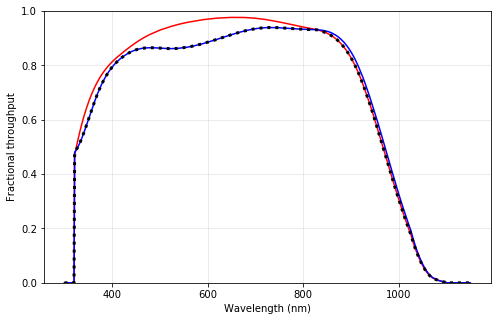

In [22]:
plt.figure(figsize=(8, 5))
plt.plot(det['e2v'].wavelen, det['e2v'].sb, 'r-')
plt.plot(det['itl'].wavelen, det['itl'].sb, 'b-')
plt.plot(det['det'].wavelen, det['det'].sb, 'k:', linewidth=3)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

### Lenses

In [23]:
lens = {}
for l in ('lens1', 'lens2', 'lens3'):
    lens[l] = st.buildLens(defaultDirs[l], addLosses=True)

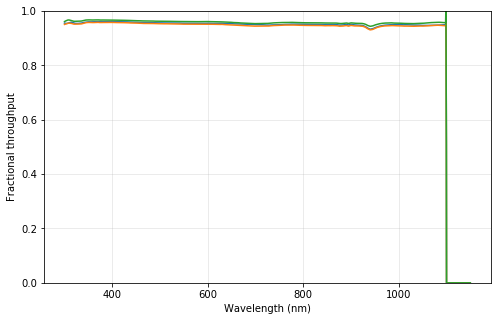

In [24]:
plt.figure(figsize=(8, 5))
for l in ('lens1', 'lens2', 'lens3'):
    plt.plot(lens[l].wavelen, lens[l].sb)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

### Filters

In [26]:
filterlist = ('u', 'g', 'r', 'i', 'z', 'y')
filters = st.buildFilters(defaultDirs['filters'])

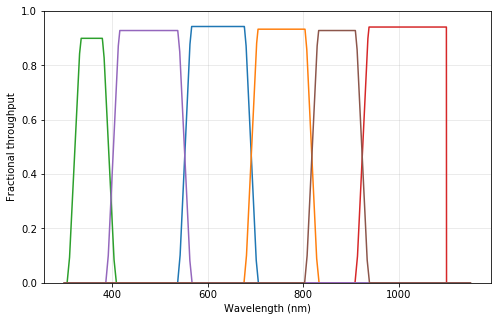

In [27]:
plt.figure(figsize=(8, 5))
for f in filters:
    plt.plot(filters[f].wavelen, filters[f].sb)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

### Mirrors

In [30]:
mirrors = {}
for l in ('mirror1', 'mirror2', 'mirror3'):
    mirrors[l] = st.buildMirror(defaultDirs[l], addLosses=True)

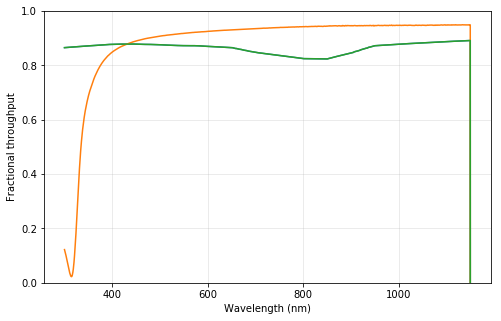

In [32]:
plt.figure(figsize=(8, 5))
for l in ('mirror1', 'mirror2', 'mirror3'):
    plt.plot(mirrors[l].wavelen, mirrors[l].sb)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.ylabel('Fractional throughput')
plt.xlabel('Wavelength (nm)')

### Combined

In [33]:
hardware, system = st.buildHardwareAndSystem(defaultDirs, addLosses=True, 
                                             atmosphereOverride=None, shiftFilters=None)

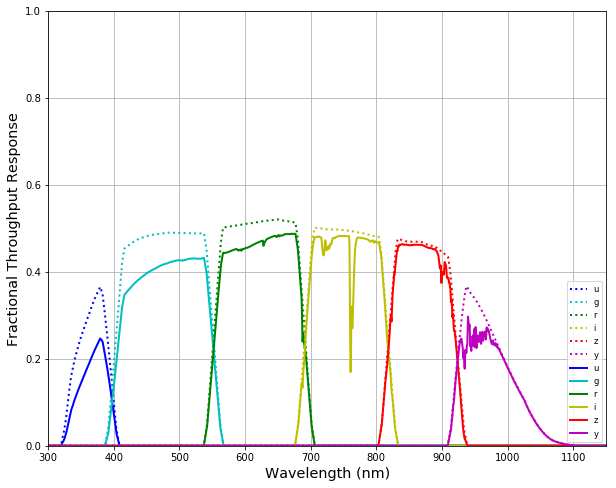

In [35]:
plt.figure(figsize=(10, 8))
st.plotBandpasses(hardware, newfig=False, linestyle=':', addlegend=False)
st.plotBandpasses(system, newfig=False, linestyle='-')